In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("colors.csv", header=None, names=['color','color_name','hex','R','G','B'])
df

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255
...,...,...,...,...,...,...
860,yellow_orange,Yellow Orange,#ffae42,255,174,66
861,yellow_process,Yellow (Process),#ffef00,255,239,0
862,yellow_ryb,Yellow (Ryb),#fefe33,254,254,51
863,zaffre,Zaffre,#0014a8,0,20,168


In [3]:
img = cv2.imread("color palette.jpg")

In [4]:
img

array([[[255, 255, 255],
        [ 76,  76,  76],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [ 76,  76,  76],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [ 76,  76,  76],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [ 76,  76,  76],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [ 76,  76,  76],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [ 76,  76,  76],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

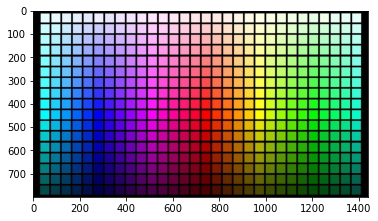

In [5]:
plt.imshow(img, cmap='gray')

In [6]:
img.shape

(800, 1440, 3)

In [7]:
img = cv2.resize(img, (700,500))

In [8]:
img

array([[[160, 160, 160],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[160, 160, 160],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[160, 160, 160],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[160, 160, 160],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[160, 160, 160],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[160, 160, 160],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [9]:
#function to calculate minimum distance from all colors and get the most matching color
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(df)):
        d = abs(R- int(df.loc[i,"R"])) + abs(G- int(df.loc[i,"G"]))+ abs(B- int(df.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = df.loc[i,"color_name"]
    
    return cname

In [10]:
#function to get x,y coordinates of mouse double click
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = xypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [11]:
cv2.namedWindow('color detection')
cv2.setMouseCallback('color detection',draw_function)

In [12]:
clicked = False
while(1):
    cv2.imshow("color detection",img)
    
    if (clicked):
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle
        cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)
        
        #Creating text string to display( Color name and RGB values )
        text = getColorName(r,g,b) + ' R='+ str(r) + ' G='+ str(g) + ' B='+ str(b)
        
        #cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)
        
        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(img, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False
        
    if cv2.waitKey(20) & 0xFF ==27:
        break

KeyboardInterrupt: 

In [13]:
cv2.destroyAllWindows()